In [1]:
# initialise
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set_style('darkgrid')

In [2]:
# read data (source: www.opensourcesports.com/basketball/)
awards = pd.read_csv('basketball_awards_players.csv')
players = pd.read_csv('basketball_players.csv', low_memory = False)

In [3]:
# breakdown of number of observations by league
print(players['lgID'].value_counts())
# filter to only show rows corresponding to the NBA
players = players[players['lgID'] == 'NBA']
awards = awards[awards['lgID'] == 'NBA']

NBA     20357
ABA      1463
NBL      1423
ABL1      205
PBLA      165
NPBL      138
Name: lgID, dtype: int64


In [4]:
# remove columns not relevant to research question
players = players.drop(['stint','tmID','lgID','GS','note'], axis=1)
awards = awards.drop(['lgID','note', 'pos'], axis=1)

# remove variables corresponding to postseason stats
cols = [c for c in players.columns if c[:4] != 'Post']
players = players[cols]

# remove players with zero games played in any given year
players = players[players['GP'] != 0]

In [5]:
# checking for sum of stats by year that equal zero
stats = players.columns[3:]   # identify all stats from players data frame
print(stats)
yearStats = players.groupby('year')[stats].sum() # sum stats by year
yearStats.head(10)

Index(['minutes', 'points', 'oRebounds', 'dRebounds', 'rebounds', 'assists',
       'steals', 'blocks', 'turnovers', 'PF', 'fgAttempted', 'fgMade',
       'ftAttempted', 'ftMade', 'threeAttempted', 'threeMade'],
      dtype='object')


,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
year,,,,,,,,,,,,,,,,
1946,0,44861,0,0,0,4567,0,0,0,13796,61518,17175,16397,10511,0,0
1947,0,27897,0,0,0,2697,0,0,0,8498,36911,10454,10353,6989,0,0
1948,0,57609,0,0,0,13382,0,0,0,18440,63796,20879,22562,15851,0,0
1949,0,89816,0,0,0,21996,0,0,0,30235,93221,31671,37143,26474,0,0
1950,0,51096,0,0,27847,12961,0,0,0,15754,50299,18067,20387,14962,0,0
1951,148247,51355,0,0,29749,13513,0,0,0,16211,49344,18197,20269,14961,0,0
1952,167608,56945,0,0,32022,14268,0,0,0,19812,53040,19621,24746,17703,0,0
1953,142792,47587,0,0,28017,12197,0,0,0,14911,44685,16738,19893,14111,0,0
1954,132413,51284,0,0,29115,13014,0,0,0,13677,47633,18338,19771,14608,0,0


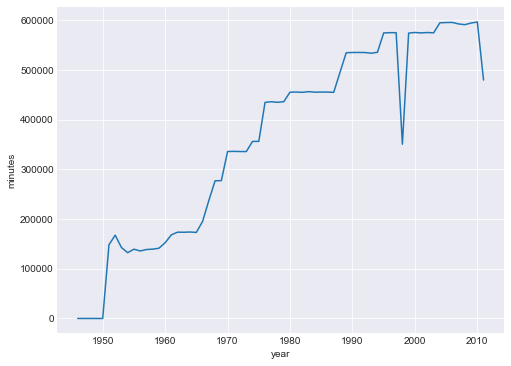

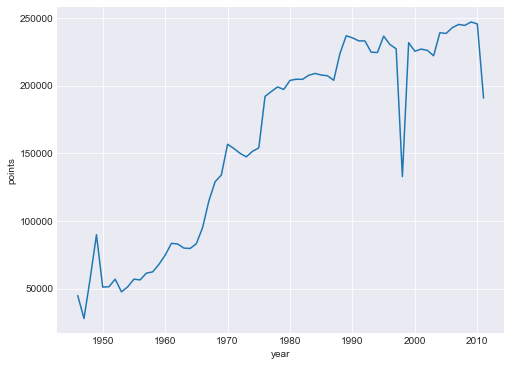

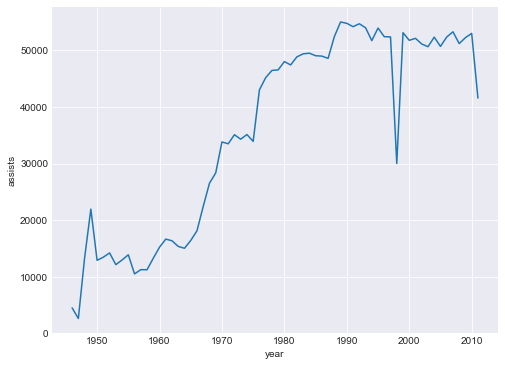

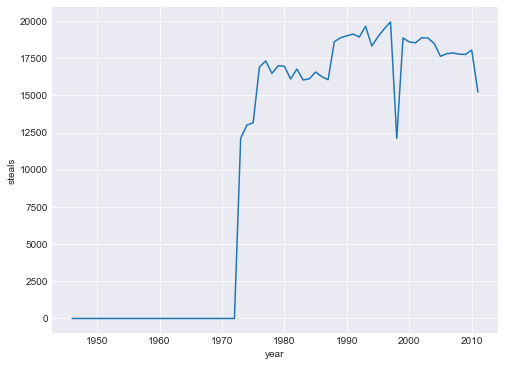

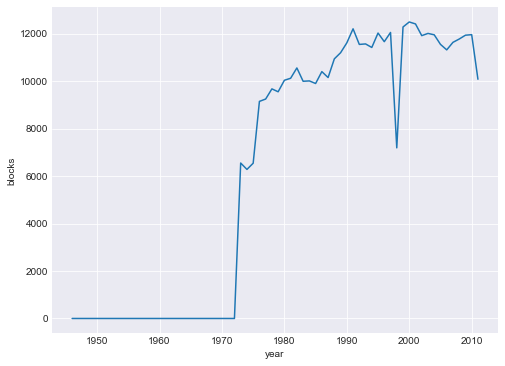

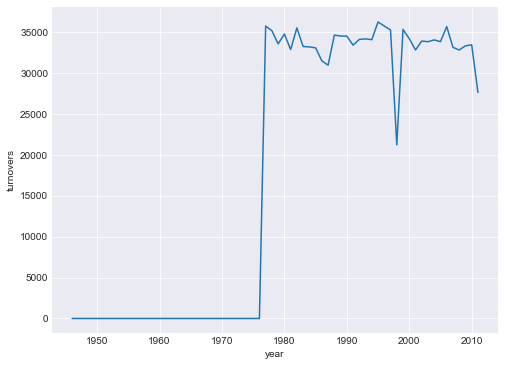

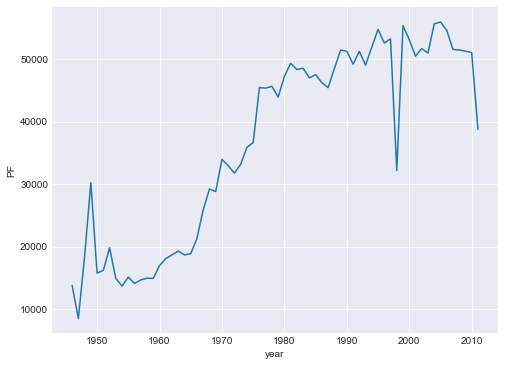

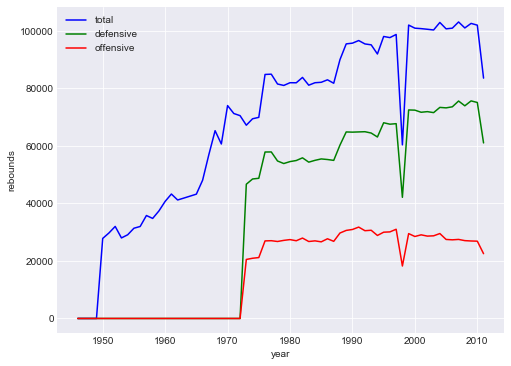

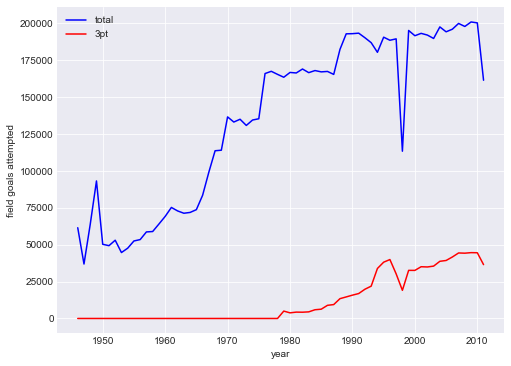

In [6]:
# visualising sum of selected stats by year
def plot_stats_by_year(statistic):
    fig, ax = plt.subplots(figsize = (8,6))
    ax.plot(yearStats.index, yearStats[statistic])
    ax.set_xlabel('year')
    ax.set_ylabel(statistic)
    plt.show()

# plot all stats over the years
for s in stats:
    if 'rebounds' in s.lower():
        continue    # ignore rebounds (see below)
    elif 'Attempted' in s:
        continue    # ignore fg, fg, three attempts (see below)
    elif 'Made' in s:
        continue    # ignore fg, fg, three made (see below)
    else:
        plot_stats_by_year(s)
        
# plot rebounds over the years
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(yearStats.index, yearStats.rebounds, color = 'blue', label = 'total')
ax.plot(yearStats.index, yearStats.dRebounds, color = 'green', label = 'defensive')
ax.plot(yearStats.index, yearStats.oRebounds, color = 'red', label = 'offensive')
ax.set_xlabel('year')
ax.set_ylabel('rebounds')
plt.legend()
plt.show()

# plot field goal and three point attempts over the years
fig, ax = plt.subplots(figsize = (8,6))
ax.plot(yearStats.index, yearStats.fgAttempted, color = 'blue', label = 'total')
ax.plot(yearStats.index, yearStats.threeAttempted, color = 'red', label = '3pt')
ax.set_xlabel('year')
ax.set_ylabel('field goals attempted')
plt.legend()
plt.show()

In [7]:
# remove years with incomplete stats
yearStats = yearStats[(yearStats.T != 0).all()] # remove rows with zeros
yearStats.head(10)

,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade
year,,,,,,,,,,,,,,,,
1979,436260,197239,27168,53897,81065,46567,16993,9561,33596,43952,163521,78735,50212,38366,5003,1403
1980,455340,203886,27437,54573,82010,48034,16964,10046,34803,47265,166769,81025,54481,40900,3815,936
1981,455690,204776,27039,54948,81987,47438,16107,10131,32908,49352,166418,81732,53889,40183,4308,1129
1982,455090,204658,27970,55883,83853,48862,16778,10566,35555,48373,169098,82087,53336,39473,4248,1011
1983,456490,207668,26772,54378,81150,49397,16041,10004,33278,48573,166638,82007,55992,42534,4484,1120
1984,455340,209041,26999,55009,82008,49515,16122,10019,33227,47036,168048,82532,55381,42306,5917,1671
1985,455640,207875,26661,55500,82161,49065,16576,9910,33114,47543,167166,81465,57079,43171,6293,1774
1986,455590,207338,27725,55295,83020,48998,16264,10411,31523,46277,167455,80422,57449,43807,8913,2687
1987,455040,203993,26834,54994,81828,48599,16055,10161,30988,45461,165441,79473,54933,42068,9421,2979


In [8]:
# filter players and awards datasets to only include years with complete stats
players = players[players['year'].isin(yearStats.index)]
awards = awards[awards['year'].isin(yearStats.index)]

year
1998    50
2011    66
Name: GP, dtype: int64


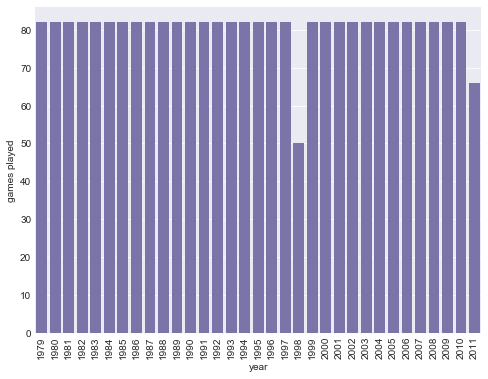

In [9]:
# determining total number of games played each year, bar plot
totalGames = players.groupby('year')['GP'].max()
print(totalGames[totalGames != totalGames.max()])
fig, ax = plt.subplots(figsize = (8,6))
sns.barplot(totalGames.index, totalGames, color = '#756bb1')
ax.set_ylabel('games played')
ax.set_xticklabels(totalGames.index, rotation = 'vertical')
plt.show()

In [10]:
# combining rows for players who played for more than 1 team in the same year
players = players.groupby(['playerID', 'year']).sum().reset_index()

# playerID willish03 had 106 games in 2010, so his stats were checked
print(players.loc[players['playerID'] == 'willish03',:], '\n')
# compare stats at https://www.basketball-reference.com/players/w/willish03.html
# remove row with IDs 12870 and 12871 due to discrepancy
players = players.drop([12870, 12871])
print(players.loc[players['playerID'] == 'willish03',:])

        playerID  year   GP  minutes  points  oRebounds  dRebounds  rebounds  \
12867  willish03  2006   46      556     180         33         50        83   
12868  willish03  2007   65      965     437         54        123       177   
12869  willish03  2008   15      168      42         19         27        46   
12870  willish03  2010  106     2036     652        134        328       462   
12871  willish03  2011   58     1276     268        141        209       350   

       assists  steals  blocks  turnovers   PF  fgAttempted  fgMade  \
12867       22       6       8         24   69          160      75   
12868       59      26      26         58  132          372     159   
12869        2       2       9          5   19           56      16   
12870       66      57      73         83  256          566     246   
12871       35      47      39         66  149          201      96   

       ftAttempted  ftMade  threeAttempted  threeMade  
12867           20      11          

In [11]:
# compute average stats per game
playersPG = players.iloc[:,0:3] # select playerID, year and GP
for s in stats:
    # for each stat listed in stats, compute the avg per game
    playersPG[s] = np.divide(players[s], players['GP']).round(2)
# compute field goal, free throw and three point fg percentages
with np.errstate(divide='ignore',  invalid='ignore'):    
    playersPG['fgPct'] = (np.divide(players['fgMade'], players['fgAttempted'])*100).round(2)
    playersPG['ftPct'] = (np.divide(players['ftMade'], players['ftAttempted'])*100).round(2)
    playersPG['threePct'] = (np.divide(players['threeMade'], players['threeAttempted'])*100).round(2)
playersPG.head(10)

,playerID,year,GP,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,...,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,fgPct,ftPct,threePct
0,abdelal01,1990,43,6.74,3.14,0.63,1.44,2.07,0.28,0.09,...,0.91,2.70,1.28,1.02,0.58,0.00,0.0,47.41,56.82,NaN
1,abdelal01,1991,71,13.15,6.08,1.14,2.52,3.66,0.42,0.35,...,1.86,5.08,2.51,1.42,1.07,0.00,0.0,49.31,75.25,NaN
2,abdelal01,1992,75,17.48,7.71,1.68,2.81,4.49,0.36,0.33,...,2.52,6.31,3.27,1.55,1.17,0.01,0.0,51.80,75.86,0.0
3,abdelal01,1993,13,12.23,4.92,0.92,2.62,3.54,0.23,0.15,...,1.54,4.23,1.85,1.92,1.23,0.00,0.0,43.64,64.00,NaN
4,abdelal01,1994,54,9.37,4.74,0.69,1.43,2.11,0.24,0.28,...,1.93,4.28,2.19,0.65,0.37,0.04,0.0,51.08,57.14,0.0
5,abdulka01,1979,82,38.33,24.80,2.32,8.49,10.80,4.52,0.99,...,2.63,16.87,10.18,5.80,4.44,0.01,0.0,60.38,76.47,0.0
6,abdulka01,1980,80,37.20,26.19,2.46,7.80,10.26,3.40,0.74,...,3.05,18.21,10.45,6.90,5.29,0.01,0.0,57.38,76.63,0.0
7,abdulka01,1981,76,35.22,23.92,2.26,6.41,8.67,2.96,0.83,...,2.95,17.12,9.91,5.82,4.11,0.04,0.0,57.88,70.59,0.0
8,abdulka01,1982,79,32.33,21.80,2.11,5.38,7.49,2.53,0.77,...,2.78,15.54,9.14,4.70,3.52,0.03,0.0,58.79,74.93,0.0
9,abdulka01,1983,80,32.78,21.46,2.11,5.22,7.34,2.64,0.69,...,2.64,15.48,8.95,4.92,3.56,0.01,0.0,57.84,72.34,0.0


In [12]:
# summary statistics of player stats, excluding playerID and year
summaryStats = playersPG.iloc[:,2:].describe()
summaryStats.round(2)

,GP,minutes,points,oRebounds,dRebounds,rebounds,assists,steals,blocks,turnovers,PF,fgAttempted,fgMade,ftAttempted,ftMade,threeAttempted,threeMade,fgPct,ftPct,threePct
count,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13139.00,13102.00,12800.00,10847.00
mean,55.50,20.75,8.49,1.11,2.52,3.63,1.94,0.69,0.43,1.32,2.03,7.08,3.24,2.24,1.67,0.98,0.34,44.37,72.26,23.90
std,25.17,10.36,6.15,0.89,1.82,2.60,1.91,0.49,0.54,0.83,0.87,4.77,2.33,1.85,1.46,1.41,0.53,8.72,13.87,17.72
min,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,37.00,12.00,3.62,0.44,1.19,1.72,0.61,0.33,0.10,0.68,1.39,3.25,1.39,0.90,0.62,0.03,0.00,40.82,66.67,0.00
50%,64.00,20.22,6.95,0.86,2.09,2.97,1.33,0.60,0.25,1.15,2.03,5.92,2.67,1.70,1.23,0.26,0.05,44.94,74.84,27.78
75%,78.00,29.66,12.10,1.57,3.36,4.90,2.63,0.95,0.55,1.83,2.67,10.06,4.65,3.07,2.31,1.48,0.48,48.92,80.95,35.86
max,85.00,43.70,37.09,6.99,12.34,18.66,14.54,3.67,5.56,4.84,6.00,27.82,13.39,13.14,10.29,8.69,3.45,100.00,100.00,100.00


In [13]:
# define functions for player per game stats plots

def plot_hist(series):
    fig, ax = plt.subplots(figsize = (8,6))
    sns.distplot(playersPG[series], kde = False, color = 'blue', hist_kws = {'alpha': 0.8, 'edgecolor': 'black'})
    if series == 'year':
        ax.set_xlabel(series)
    elif 'Pct' in series:
        ax.set_xlabel(series)
    else:
        ax.set_xlabel(series + ' per game')
    plt.show()

def plot_pg_stat(s1, s2, annualMean = False, regLine = False, logx = False, logy = False, alpha = 0.2):
    # annualMean specifies if the avg stat per year will be added to the plot
    # regLIne specifies if a linear regression line is to be plotted
    # logx and logy specify if whether or not to take the log of those variables
    # alpha = 0.2 makes the dense scatterplots easier to see, can be altered
    temp = pd.DataFrame(playersPG[[s1, s2]])
    if logx:
        temp[s1] = np.log(temp[s1])
    if logy:
        temp[s2] = np.log(temp[s2])
    fig, ax = plt.subplots(figsize = (8,6))
    if regLine:
        sns.regplot(s1, s2, data = temp, ci = None, color = '#ff7f00', scatter_kws = {'alpha': alpha, 'color': 'blue'})
    else:
        ax.scatter(temp[s1], temp[s2], alpha = alpha, color = 'blue')
    if s1 == 'year' and annualMean:
        ax.plot(sorted(temp[s1].unique()), temp.groupby(s1)[s2].mean(), color = 'red')
    if logx:
        ax.set_xlabel('log (' + s1 + ')', fontsize = 16)
    elif s1 == 'year':
        ax.set_xlabel(s1, fontsize = 16)
    elif s1 == 'GP':
        ax.set_xlabel('games played', fontsize = 16)
    elif 'Pct' in s1:
        ax.set_xlabel(s1, fontsize = 16)
    else:
        ax.set_xlabel(s1 + ' per game', fontsize = 16)
    if logy:
        ax.set_ylabel('log (' + s2 + ')', fontsize = 16)
    elif 'Pct' in s2:
        ax.set_ylabel(s2, fontsize = 16)
    else:
        ax.set_ylabel(s2 + ' per game', fontsize = 16)
    plt.show()

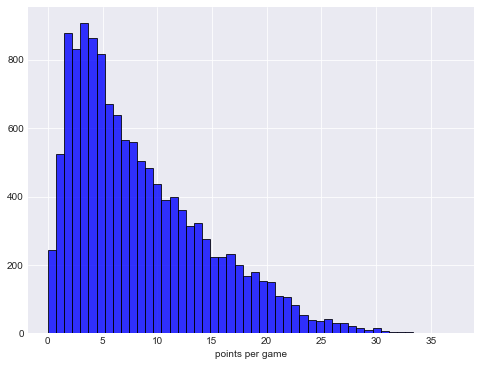

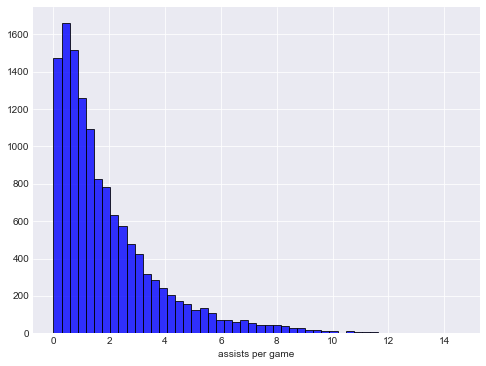

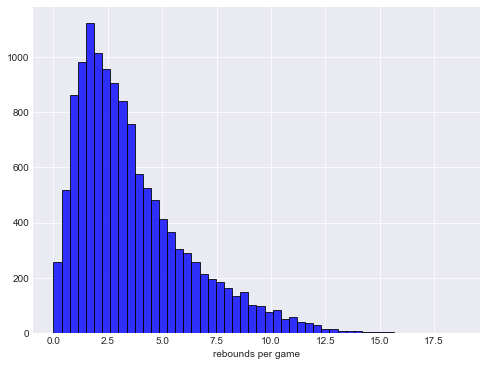

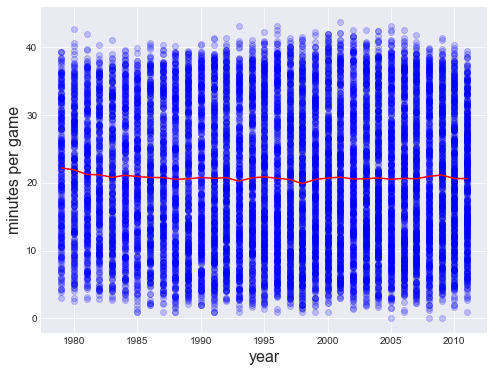

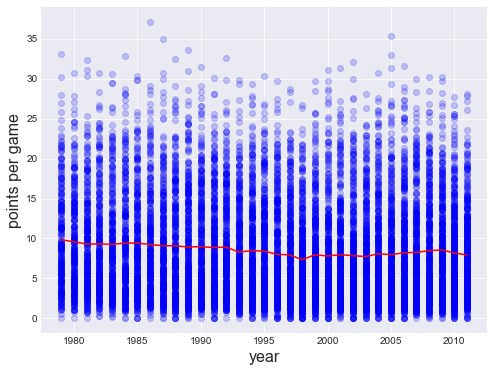

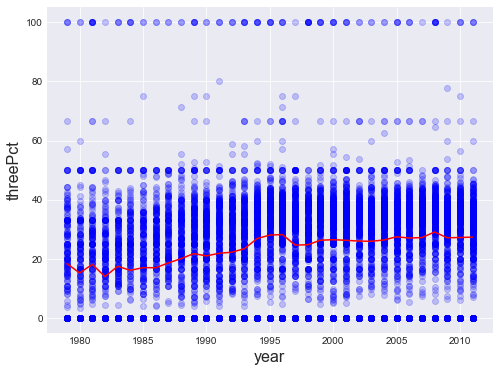

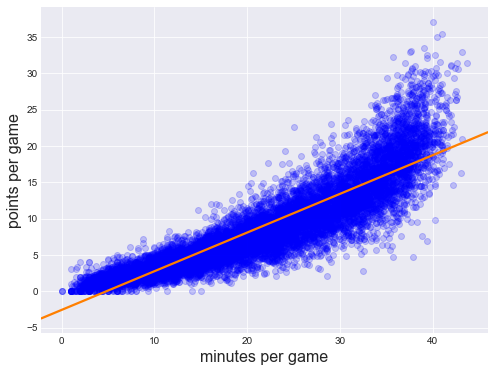

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:21: RuntimeWarning: divide by zero encountered in log
/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in log


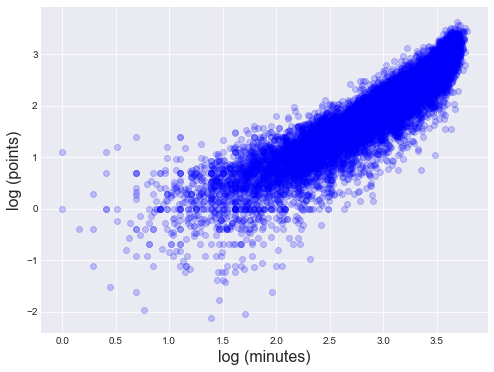

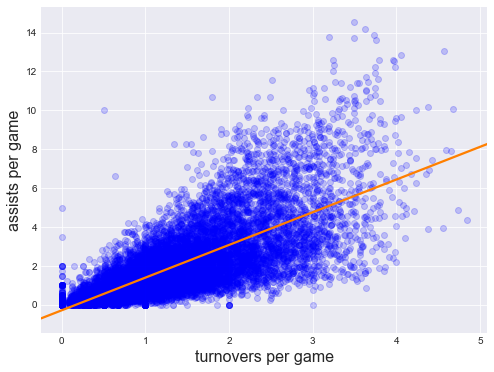

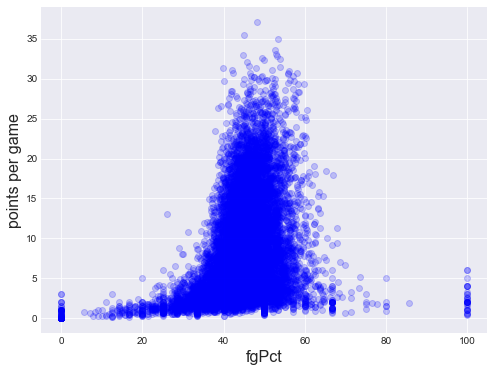

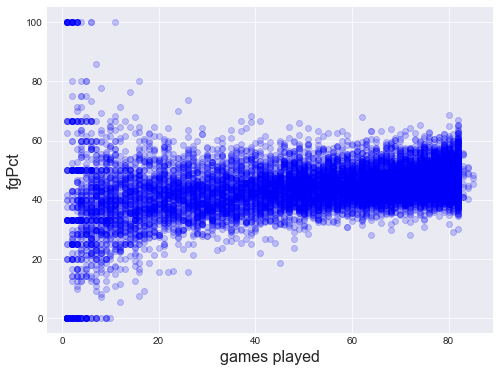

In [14]:
plot_hist('points')
plot_hist('assists')
plot_hist('rebounds')
plot_pg_stat('year', 'minutes', annualMean = True)
plot_pg_stat('year', 'points', annualMean = True)
plot_pg_stat('year', 'threePct', annualMean = True)
plot_pg_stat('minutes', 'points', regLine = True)
plot_pg_stat('minutes', 'points', logx = True, logy = True)
plot_pg_stat('turnovers', 'assists', regLine = True)
plot_pg_stat('fgPct', 'points')
plot_pg_stat('GP', 'fgPct')

In [15]:
# select only All-NBA Team awards
allNBA = awards[awards['award'].str.contains('All-NBA')]

# select only players awarded regular season MVP
seasonMVP = awards[awards['award'] == 'Most Valuable Player']

# select only players awarded Defensive Player of the Year
seasonDPY = awards[awards['award'] == 'Defensive Player of the Year']

In [16]:
# join playersPG and allNBA according to playerID and year
playersMerged = pd.merge(playersPG, seasonMVP, how='left', on=['playerID','year'])
playersMerged.rename(columns={'award': 'MVP'}, inplace=True)
playersMerged = pd.merge(playersMerged, seasonDPY, how='left', on=['playerID','year'])
playersMerged.rename(columns={'award': 'DPY'}, inplace=True)
playersMerged = pd.merge(playersMerged, allNBA, how='left', on=['playerID','year'])
playersMerged.rename(columns={'award': 'allNBA'}, inplace=True)

In [17]:
# determine total number of players with awards in the dataset
print(playersMerged['allNBA'].value_counts(), '\n')
print(playersMerged['MVP'].value_counts(), '\n')
print(playersMerged['DPY'].value_counts())

All-NBA First Team     165
All-NBA Second Team    165
All-NBA Third Team     120
Name: allNBA, dtype: int64 

Most Valuable Player    33
Name: MVP, dtype: int64 

Defensive Player of the Year    30
Name: DPY, dtype: int64


In [18]:
# convert awards columns to categorial (1: player received award, 0: no award)
playersMerged['allNBA'] = playersMerged['allNBA'].notnull().astype(int)
playersMerged['MVP'] = playersMerged['MVP'].notnull().astype(int)
playersMerged['DPY'] = playersMerged['DPY'].notnull().astype(int)

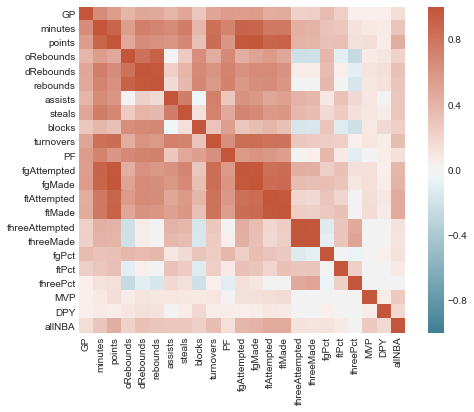

In [19]:
# visualise correlation matrix
corMatrix = playersMerged.iloc[:,2:].corr()
fig, ax = plt.subplots(figsize = (8,6))
sns.heatmap(corMatrix, ax = ax, vmin = -1, vmax = 1, mask = np.zeros_like(corMatrix, dtype = np.bool),
            cmap = sns.diverging_palette(220, 20, as_cmap = True), square = True)
#heatmap code source: https://stackoverflow.com/a/42977946/8452935
plt.show()

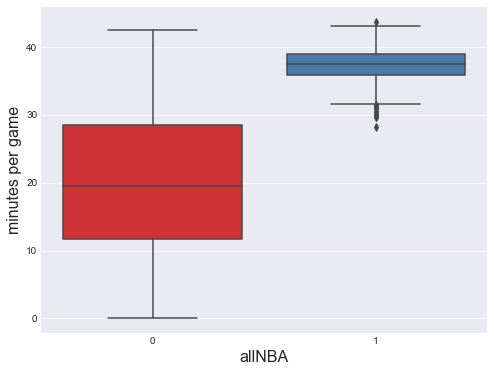

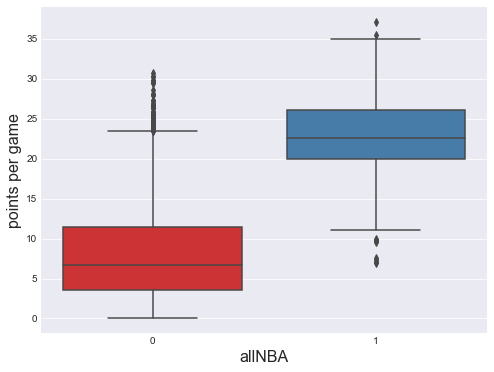

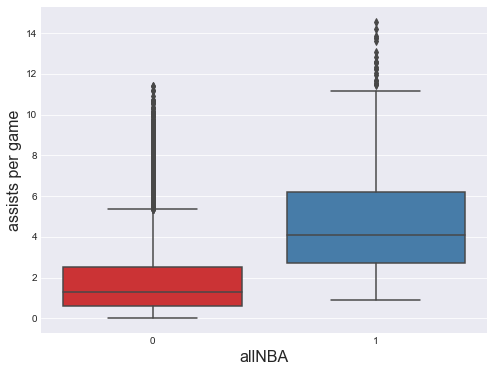

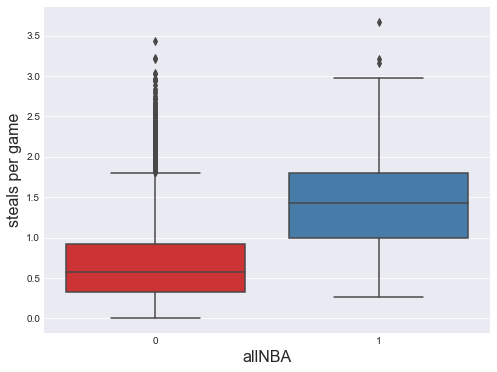

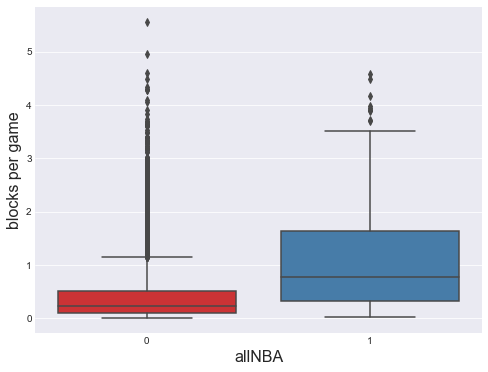

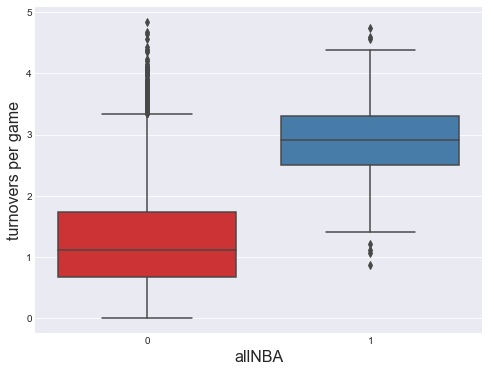

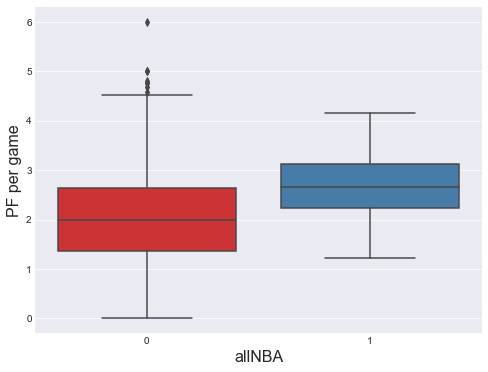

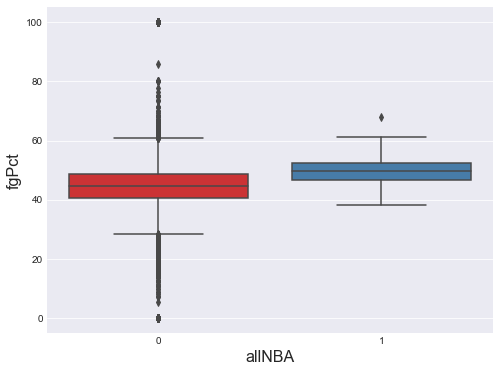

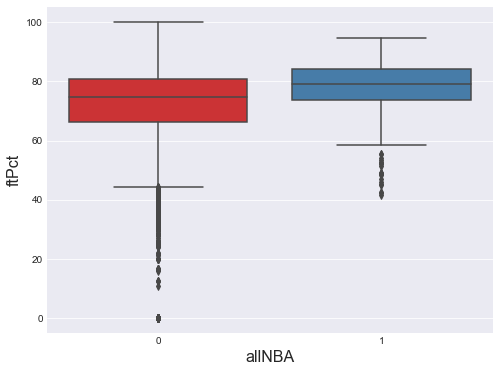

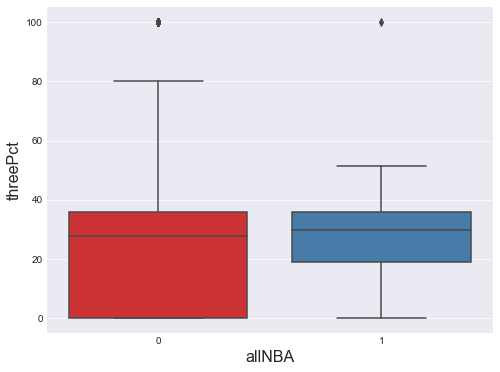

In [20]:
# plotting player stats grouped by players with awards and players without awards
def stats_awards_boxplot(var, award = "allNBA"):
    # var is the variable of interest
    # award is the name of the award to categorise by (either allNBA, MVP or DPY)
    # award defaults to allNBA if not specified
    # all variables take strings as inputs
    fig, ax = plt.subplots(figsize = (8,6))
    sns.boxplot(x = award, y = var, data = playersMerged, palette = "Set1")
    ax.set_xlabel(award, fontsize = 16)
    if 'Pct' in var:
        ax.set_ylabel(var, fontsize = 16)
    elif var == 'GP':
        ax.set_ylabel('games played', fontsize = 16)
    else:
        ax.set_ylabel(var + ' per game', fontsize = 16)
    plt.show()

for s in stats:
    if 'rebounds' in s.lower():
        continue    # ignore rebounds (see below)
    elif 'Attempted' in s:
        continue    # ignore fg, fg, three attempts (see below)
    elif 'Made' in s:
        continue    # ignore fg, fg, three made (see below)
    else:
        stats_awards_boxplot(s)

stats_awards_boxplot('fgPct')
stats_awards_boxplot('ftPct')
stats_awards_boxplot('threePct')

In [21]:
# number of players with each award in each year (check to ensure correct number of awards per year)
print(playersMerged[playersMerged['allNBA'] == 1].groupby('year')['allNBA'].sum())
print(playersMerged[playersMerged['MVP'] == 1].groupby('year')['MVP'].sum())
print(playersMerged[playersMerged['DPY'] == 1].groupby('year')['DPY'].sum())

year
1979    10
1980    10
1981    10
1982    10
1983    10
1984    10
1985    10
1986    10
1987    10
1988    15
1989    15
1990    15
1991    15
1992    15
1993    15
1994    15
1995    15
1996    15
1997    15
1998    15
1999    15
2000    15
2001    15
2002    15
2003    15
2004    15
2005    15
2006    15
2007    15
2008    15
2009    15
2010    15
2011    15
Name: allNBA, dtype: int64
year
1979    1
1980    1
1981    1
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2006    1
2007    1
2008    1
2009    1
2010    1
2011    1
Name: MVP, dtype: int64
year
1982    1
1983    1
1984    1
1985    1
1986    1
1987    1
1988    1
1989    1
1990    1
1991    1
1992    1
1993    1
1994    1
1995    1
1996    1
1997    1
1998    1
1999    1
2000    1
2001    1
2002    1
2003    1
2004    1
2005    1
2